In [2]:
import sys
import os
sys.path.insert(0, f'{os.getenv("HOME")}/Devel/simgio/PYsimgio/')

import simgio_utils as su
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.ticker import StrMethodFormatter, NullFormatter

In [3]:
n_tasks = 60
n_executions = 200
nh_max = 41


t_begin = 6000
t_end = 14000


heuristics = [
    "FairShare",
    "Exclusive-FCFS",
    "Set-10",
    "Set-FairShare",
    "Sharing+Priority"
]


df_all, ev = su.load_all(priorities=heuristics, n_tasks=n_tasks, n_executions=n_executions, csv_folder="csv/")
df_all = su.compute_metrics(df_all,t_begin, t_end)

df_fairshare = ev.loc[ev.priority == "FairShare"]
df_exclusive = ev.loc[ev.priority == "Exclusive-FCFS"]
df_set10 = ev.loc[ev.priority == "Set-10"]


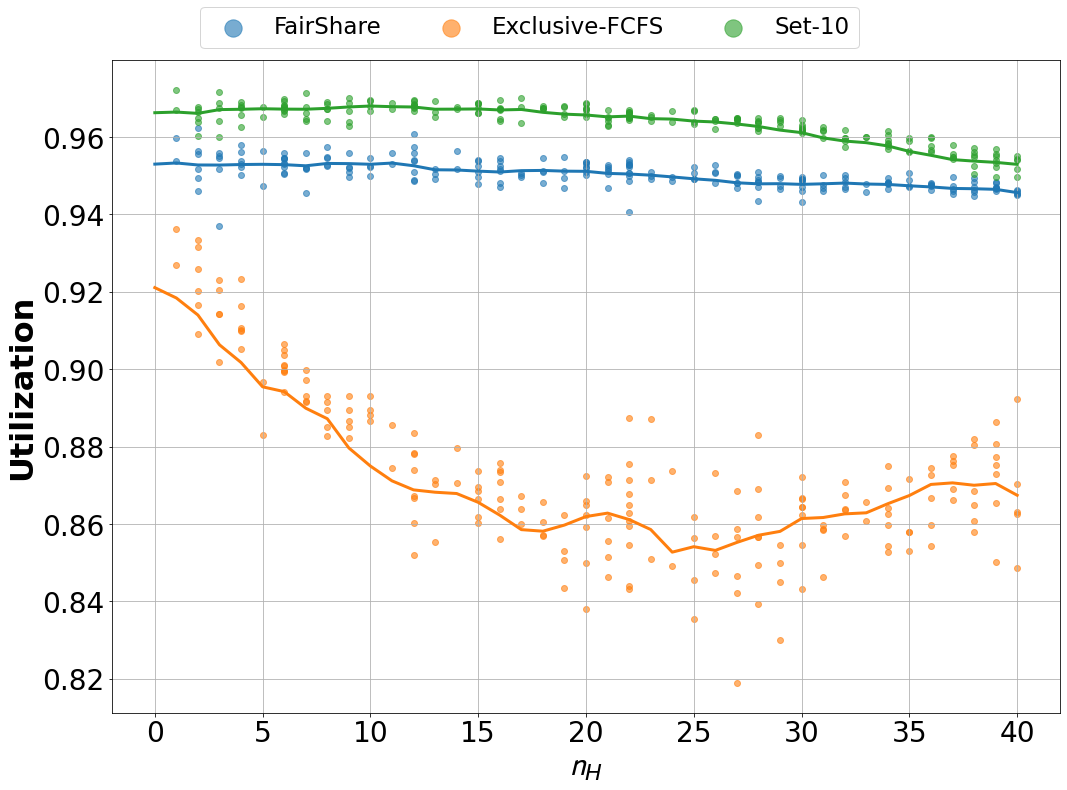

In [4]:
su.plot_scatter_utilization({"FairShare": df_fairshare,
                            "Exclusive-FCFS": df_exclusive,
                             "Set-10": df_set10},
                            x_plot=[i for i in range(0, nh_max)],
                            granularity=3.5,
                            figsize=(17, 12))

In [5]:
ut_set10 = df_set10.groupby('execution_id').utilization.mean().mean()
ut_fairshare = df_fairshare.groupby('execution_id').utilization.mean().mean()

optimal=0.986

In [6]:
df_set10.utilization

4      0.964902
9      0.968159
14     0.966134
19     0.951633
24     0.965213
         ...   
979    0.955017
984    0.967193
989    0.949737
994    0.968751
999    0.962468
Name: utilization, Length: 200, dtype: float64

In [7]:
((optimal - ut_fairshare) /optimal) * 100

3.6115786004056822

In [8]:
(abs(optimal-ut_set10)/ (optimal + ut_set10)/2 ) * 100

0.568968206492177

In [9]:
(abs(optimal-ut_fairshare)/ (optimal + ut_fairshare)/2 ) * 100

0.9194988621699728

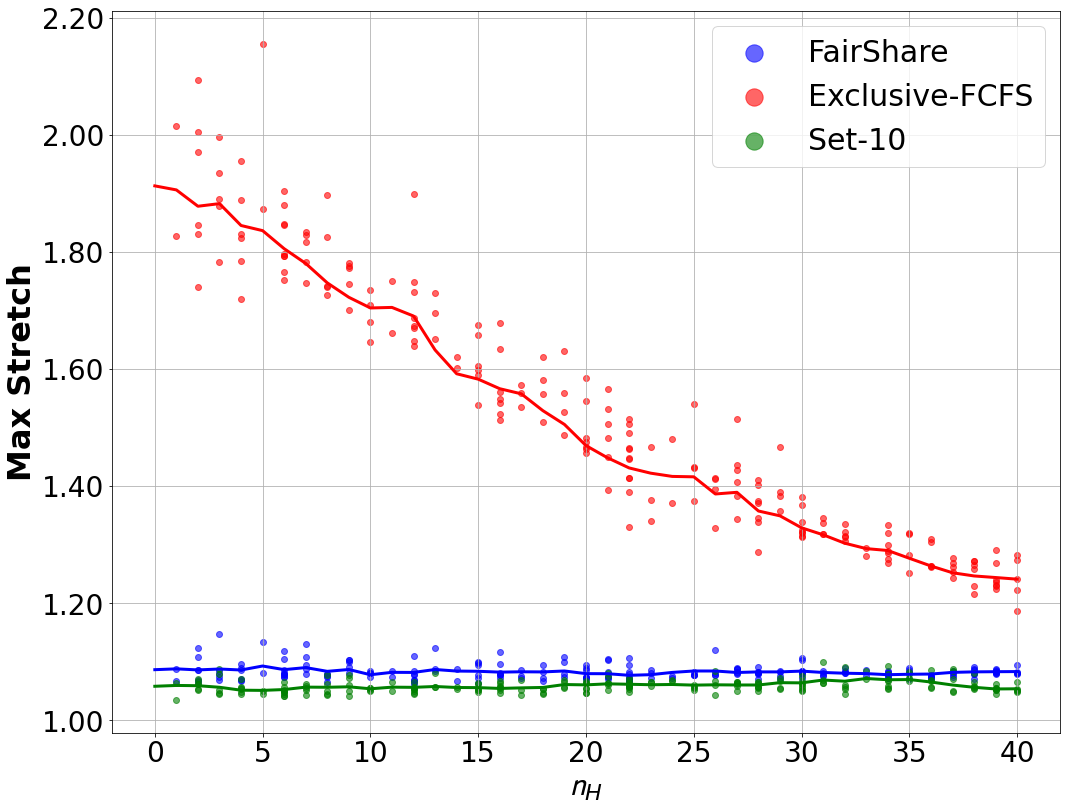

In [10]:
x_plot=[i for i in range(0, 41)]
colors=['blue', 'red', 'green']

su.plot_stretch_max(
    {"FairShare": ev.loc[ev.priority=="FairShare"],
    "Exclusive-FCFS": ev.loc[ev.priority=='Exclusive-FCFS'],
    "Set-10": ev.loc[ev.priority=='Set-10']},
    figsize=(17,12),
    colors=colors,
    x_plot=x_plot,
    granularity=2,
    save_to=f"max_stretch_{n_tasks}.pdf")

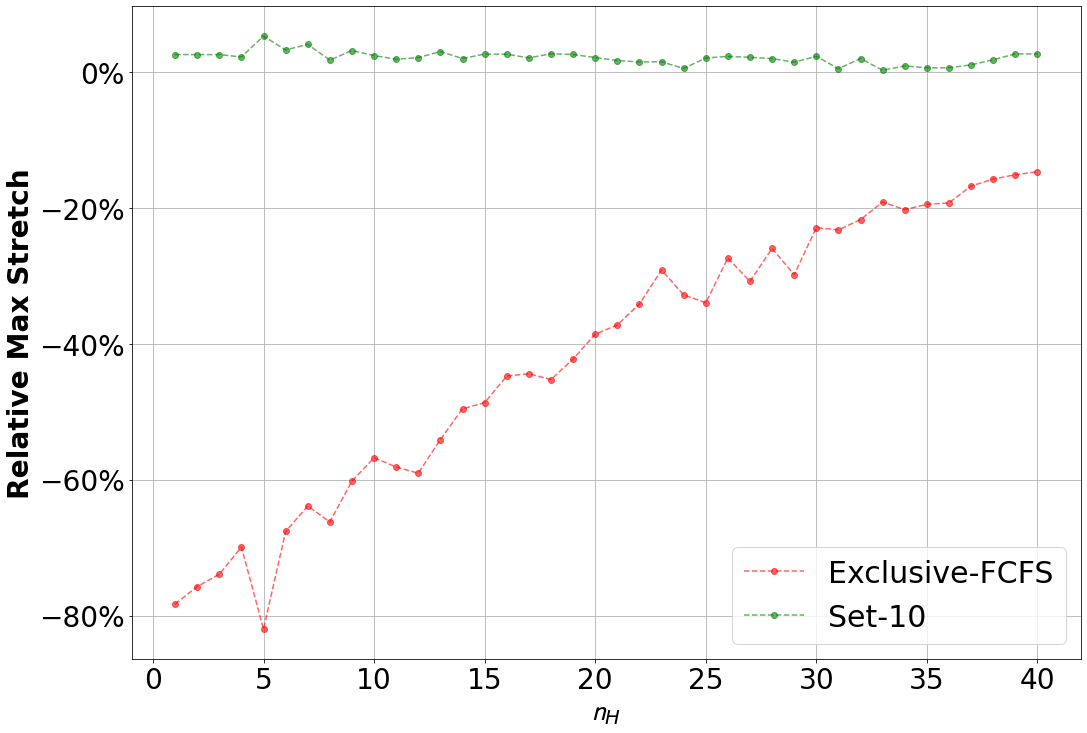

In [11]:
# Max stretch relative
y_values = su.plot_stretch_max_norm(
    {"Exclusive-FCFS": ev.loc[ev.priority=='Exclusive-FCFS'],
     "Set-10": ev.loc[ev.priority=='Set-10'] },
    df = ev.loc[ev.priority == "FairShare"],
    figsize=(17,12),
    colors=['red', 'green'],    
    save_to=f"max_stretch_relative_{n_tasks}.pdf")

In [12]:
y_values = y_values*100

In [13]:
y_values.mean()

2.1595243845175234

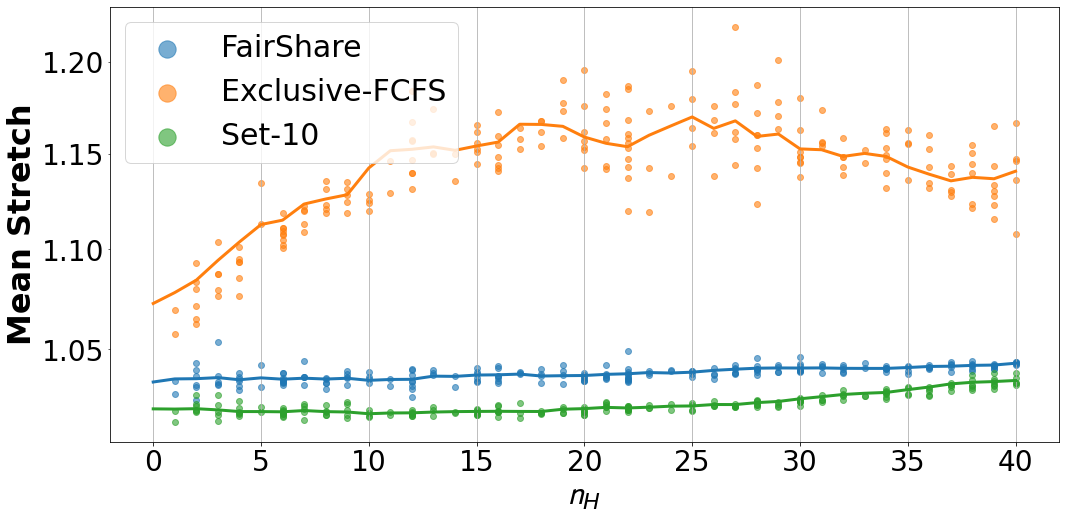

In [14]:
su.plot_scatter_stretch_gmean({
    "FairShare": df_all.loc[df_all.priority == "FairShare"],
    "Exclusive-FCFS": df_all.loc[df_all.priority == "Exclusive-FCFS"],
    "Set-10": df_all.loc[df_all.priority == "Set-10"],
},
#n_tasks=n_tasks,
x_plot=[i for i in range(0, nh_max)],
granularity=2)

In [15]:
from scipy import stats

fairshare = df_all.loc[df_all.priority == "FairShare"]
set10 = df_all.loc[df_all.priority == "Set-10"]

In [16]:
gb = set10.groupby("execution_id")
gb_norm = fairshare.groupby("execution_id")

In [43]:
df_fairshare = df_all.loc[df_all.priority == "FairShare"].reset_index().sort_values(["execution_id", "app_id"])
df_exclusive = df_all.loc[df_all.priority == "Exclusive-FCFS"].reset_index().sort_values(["execution_id", "app_id"])
df_set10 = df_all.loc[df_all.priority == "Set-10"].reset_index().sort_values(["execution_id", "app_id"])


In [103]:
#df_fairshare['io_slowdown_norm']

df_fairshare['io_slowdown_norm'] = (1 - (df_fairshare.io_slowdown.values / df_set10.io_slowdown.values)) * 100
df_exclusive['io_slowdown_norm'] = (1 - (df_exclusive.io_slowdown.values / df_set10.io_slowdown.values)) * 100

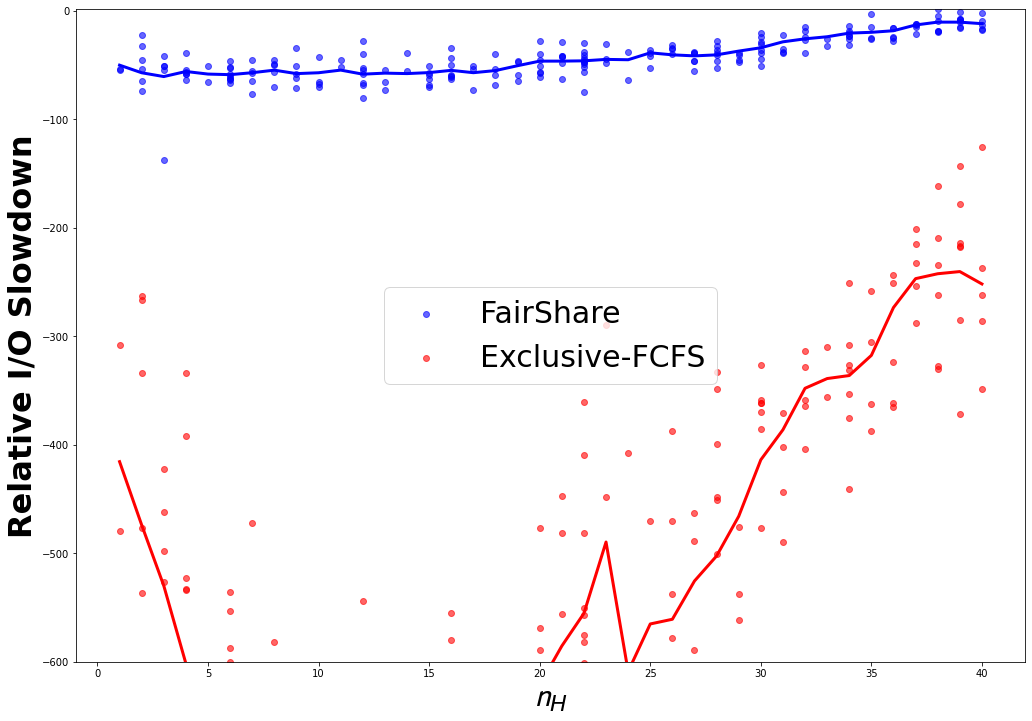

In [105]:

fig, ax = plt.subplots(1, figsize=(17, 12))






colors = ["blue",  "red"]

g= {
    "FairShare": df_fairshare,
    "Exclusive-FCFS": df_exclusive
}

color_index = 0
for key, value in g.items():
    ax.scatter(value.groupby(["execution_id"]).nh.mean(), value.groupby(["execution_id"]).io_slowdown_norm.mean(), color=colors[color_index], alpha=0.6, label=key)
    y_values = []


    for v in x_values:
        initial = v
        final = v + 1
        y_values.append(
            value.loc[(value.nh >= initial) & (value.nh <= final)].io_slowdown_norm.mean()
        )
    ax.plot(x_values, y_values, color=colors[color_index], linewidth=3)

    color_index += 1
plt.ylim((-600,1))
plt.ylabel(r'Relative I/O Slowdown', fontsize=32, fontweight='bold')
plt.xlabel(r'$\mathcal{n}_H$', fontweight='bold', fontsize=32)

lgnd = plt.legend(prop={'size': 30})
#plt.show()


In [21]:
df_fairshare = df_all.loc[df_all.priority == "FairShare"]
df_exclusive = df_all.loc[df_all.priority == "Exclusive-FCFS"]
df_set10 = df_all.loc[df_all.priority == "Set-10"]

fig, ax = plt.subplots(1, figsize=(17,8))
plt.subplots_adjust(top=0.96)



# for each element in g, plot a scatter
color_index = 0

x_values =  df_set10.groupby('nh').groups.keys()


y_values =  1 - (value.groupby('nh').io_slowdown / df.groupby('nh').io_slowdown)


    ax.plot(x_values, [100*v for v in y_values], "--o", color=colors[color_index], label=key, alpha=0.6)

    color_index += 1



plt.ylabel(r'Relative I/O Slowdown', fontsize=28, fontweight='bold')
plt.xlabel(r'$\mathcal{n}_H$', fontweight='bold', fontsize=28)

if legend:
    lgnd = plt.legend(prop={'size': 30})
        for i in range(len(lgnd.legendHandles)):
            lgnd.legendHandles[i]._sizes = [300]
        
    # ax.set_yscale('log')

    plt.title(title, fontweight='bold', fontsize=18)

    ax.tick_params(axis='both', which='major', labelsize=28)
    ax.tick_params(axis='both', which='minor', labelsize=28)

    ax.yaxis.set_major_formatter(mtick.PercentFormatter())
    ax.yaxis.set_minor_formatter(StrMethodFormatter('{x:0.2f}'))

    ax.set_yticks(yticks)
    #ax.yaxis.set_major_formatter()

    plt.grid()

    if save_to:
        fig.savefig(save_to, format=save_to.split(".")[-1], dpi=1200)
    if show:
        plt.show()

IndentationError: unexpected indent (3622658269.py, line 19)

In [ ]:
df1.groupby('nh').groups.keys()

dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

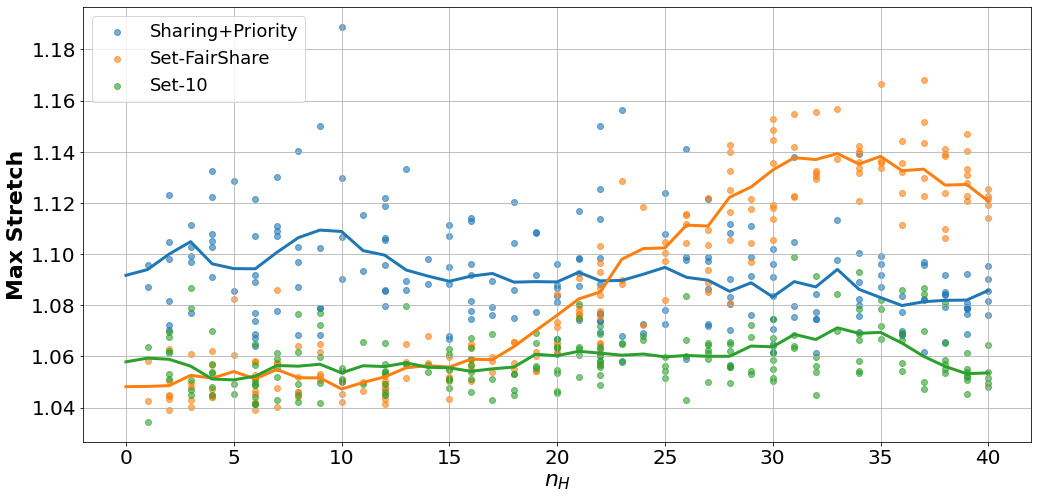

In [ ]:
su.plot_scatter_stretch_max({
    "Sharing+Priority": ev.loc[ev.priority == "Sharing+Priority"],
    "Set-FairShare": ev.loc[ev.priority == "Set-FairShare"],
    "Set-10": ev.loc[ev.priority == "Set-10"]},
x_plot=[i for i in range(0, nh_max)],
granularity=2)

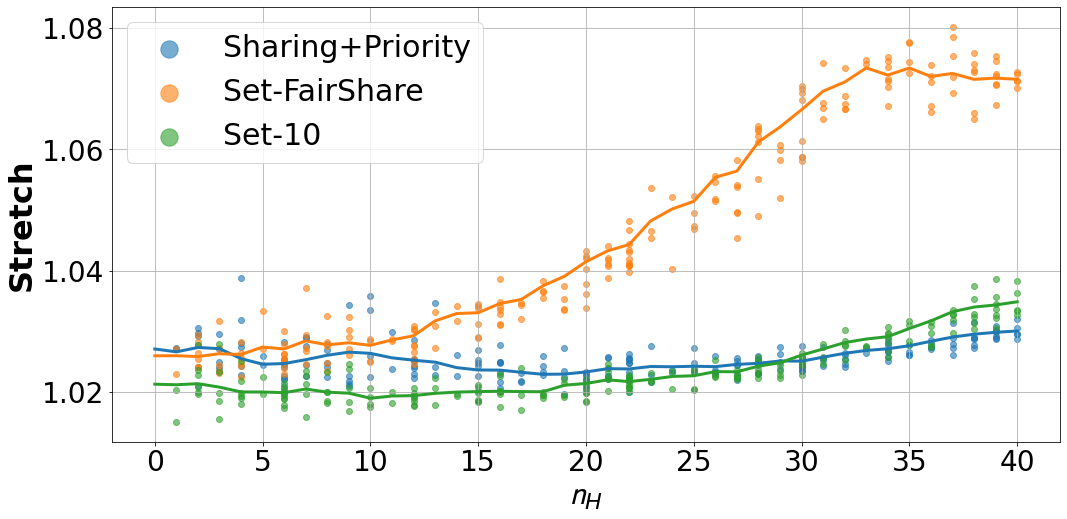

In [ ]:
su.plot_scatter_stretch_gmean({
    "Sharing+Priority": df_all.loc[df_all.priority == "Sharing+Priority"],
    "Set-FairShare": df_all.loc[df_all.priority == "Set-FairShare"],
    "Set-10": df_all.loc[df_all.priority == "Set-10"]},
x_plot=[i for i in range(0, nh_max)],
granularity=2)

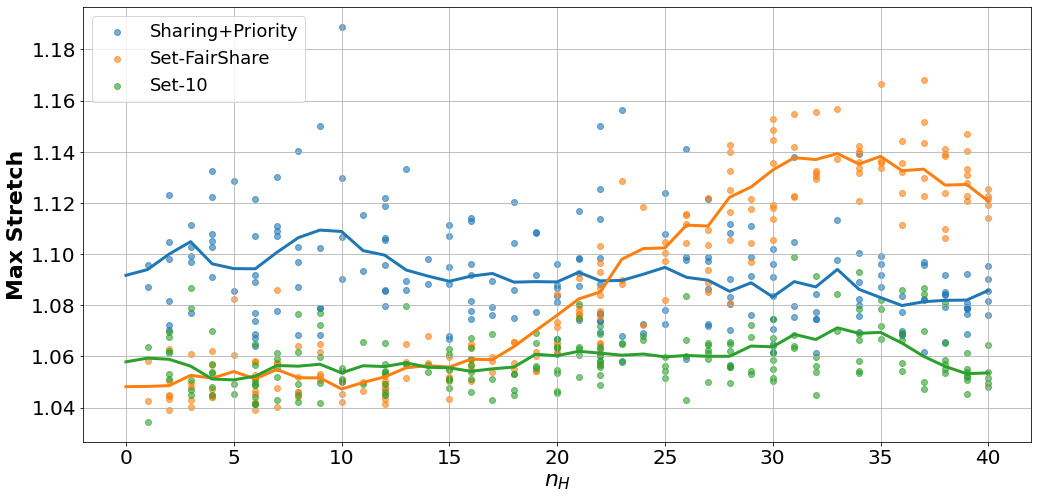

In [ ]:
su.plot_scatter_stretch_max({
    "Sharing+Priority": ev.loc[ev.priority == "Sharing+Priority"],
    "Set-FairShare": ev.loc[ev.priority == "Set-FairShare"],
    "Set-10": ev.loc[ev.priority == "Set-10"]},
x_plot=[i for i in range(0, nh_max)],
granularity=2)

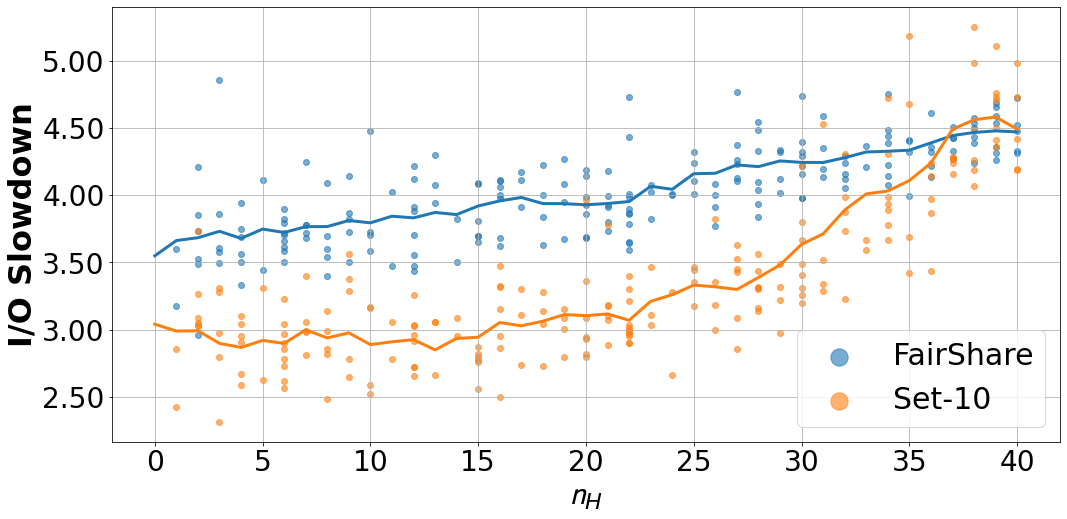

In [ ]:
su.plot_scatter_io_slowdown_gmean({
    "FairShare": df_all.loc[df_all.priority == "FairShare"],
    #"Exclusive-FCFS": df_all.loc[df_all.priority == "Exclusive-FCFS"],
    "Set-10": df_all.loc[df_all.priority == "Set-10"],
},
x_plot=[i for i in range(0, nh_max)],
granularity=2)

